In [1]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
import numpy as np
import math
warnings.filterwarnings('ignore')

In [2]:
d = pd.read_csv('stock_market.csv')
d.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [65]:
d.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [24]:
d.shape

(2035, 8)

In [4]:
d.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [5]:
d['Date'] = pd.to_datetime(d['Date'])
d.dtypes

Date                    datetime64[ns]
Open                           float64
High                           float64
Low                            float64
Last                           float64
Close                          float64
Total Trade Quantity             int64
Turnover (Lacs)                float64
dtype: object

In [6]:
d = d.sort_values('Date')
d.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [26]:
Close=d['Close']
Close

2034    121.55
2033    120.90
2032    120.65
2031    117.60
2030    118.65
         ...  
4       233.30
3       236.10
2       234.25
1       233.25
0       233.75
Name: Close, Length: 2035, dtype: float64

In [27]:
Close.shape

(2035,)

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler
Close_=scaler.fit_transform(np.array(Close).reshape(-1,1))
Close_

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [67]:
Close_.shape

(2035, 1)

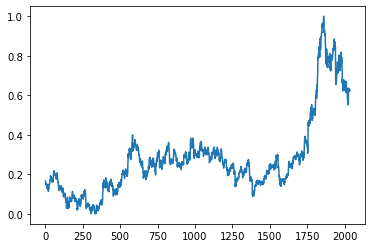

In [68]:
plt.plot(Close_)

In [70]:
d['Date']=pd.to_datetime(d['Date'])
print(d['Date'])
print(d.dtypes)

2034   2010-07-21
2033   2010-07-22
2032   2010-07-23
2031   2010-07-26
2030   2010-07-27
          ...    
4      2018-09-24
3      2018-09-25
2      2018-09-26
1      2018-09-27
0      2018-09-28
Name: Date, Length: 2035, dtype: datetime64[ns]
Date                    datetime64[ns]
Open                           float64
High                           float64
Low                            float64
Last                           float64
Close                          float64
Total Trade Quantity             int64
Turnover (Lacs)                float64
dtype: object


Text(0, 0.5, 'Close')

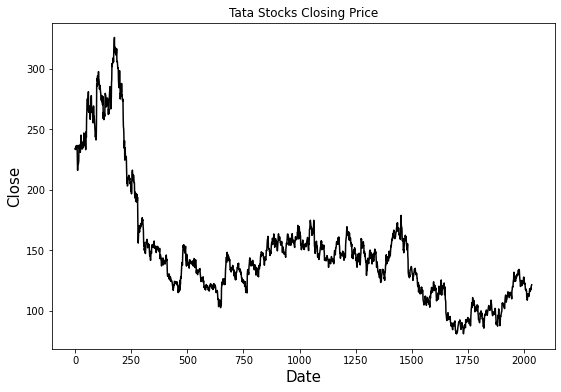

In [71]:
plt.figure(figsize = (9,6))
plt.title('Tata Stocks Closing Price')
plt.plot(d['Close'],'k')
plt.xlabel('Date',fontsize=15)
plt.ylabel('Close',fontsize=15)

In [73]:
matrix=d.corr()
matrix

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.999015,0.998825,0.997781,0.997840,0.385951,0.612877
High,0.999015,1.000000,0.998773,0.999155,0.999194,0.406405,0.630589
Low,0.998825,0.998773,1.000000,0.999051,0.999119,0.380621,0.608502
Last,0.997781,0.999155,0.999051,1.000000,0.999961,0.399328,0.624584
Close,0.997840,0.999194,0.999119,0.999961,1.000000,0.398911,0.624213
Total Trade Quantity,0.385951,0.406405,0.380621,0.399328,0.398911,1.000000,0.926931
Turnover (Lacs),0.612877,0.630589,0.608502,0.624584,0.624213,0.926931,1.000000


<AxesSubplot:>

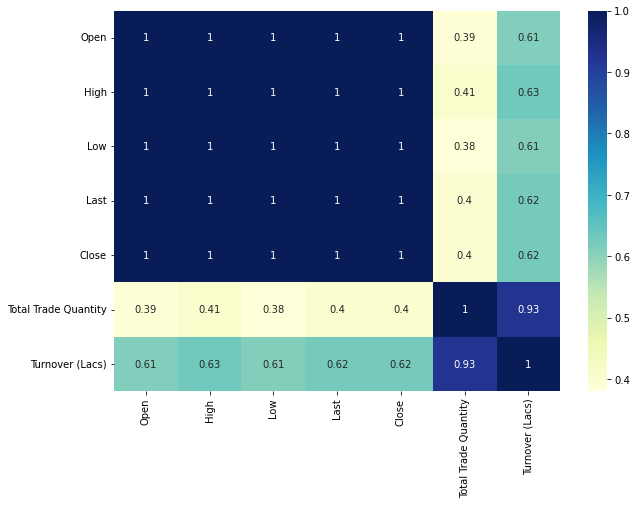

In [74]:
# dcorr = d.corr()
top_corr_features = dcorr.index
plt.figure(figsize=(10,7))
sns.heatmap(d[top_corr_features].corr(), annot=True, cmap="YlGnBu")

In [75]:
data_close = d.reset_index()['Close']
data_close.head()

0    121.55
1    120.90
2    120.65
3    117.60
4    118.65
Name: Close, dtype: float64

In [78]:
scaler = MinMaxScaler(feature_range = (0, 1))
data_close = scaler.fit_transform(np.array(data_close).reshape(-1, 1))
data_close

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [80]:
train_size = int(len(data_close)*0.70)
train_size

1424

In [82]:
test_size = len(data_close) - train_size
test_size

611

In [83]:
train, test = data_close[0 : train_size, :], data_close[train_size : len(data_close), :1]
train, test

(array([[0.16584967],
        [0.16319444],
        [0.1621732 ],
        ...,
        [0.15012255],
        [0.15747549],
        [0.15277778]]),
 array([[0.1621732 ],
        [0.15951797],
        [0.16707516],
        [0.15992647],
        [0.16053922],
        [0.16441993],
        [0.16687092],
        [0.1693219 ],
        [0.16074346],
        [0.15972222],
        [0.16401144],
        [0.15727124],
        [0.14705882],
        [0.14460784],
        [0.15175654],
        [0.15441176],
        [0.15216503],
        [0.14848856],
        [0.15522876],
        [0.15767974],
        [0.1621732 ],
        [0.16094771],
        [0.16339869],
        [0.15931373],
        [0.15972222],
        [0.16115196],
        [0.16666667],
        [0.15747549],
        [0.15379902],
        [0.14848856],
        [0.15114379],
        [0.1503268 ],
        [0.15155229],
        [0.15645425],
        [0.16033497],
        [0.1566585 ],
        [0.15686275],
        [0.17749183],
        [0.179738

In [84]:
def create_matrix(ds, time_step=1):
    dataX, dataY = [], []
    for i in range(len(ds)-time_step-1):
        a = ds[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(ds[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [85]:
step=100
X_train, y_train = create_matrix(train, step)
X_test, y_test = create_matrix(test, step)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1323, 100) (1323,)
(510, 100) (510,)


In [88]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
print(X_train)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_test)

[[[0.16584967]
  [0.16319444]
  [0.1621732 ]
  ...
  [0.14011438]
  [0.13848039]
  [0.12479575]]

 [[0.16319444]
  [0.1621732 ]
  [0.14971405]
  ...
  [0.13848039]
  [0.12479575]
  [0.12254902]]

 [[0.1621732 ]
  [0.14971405]
  [0.15400327]
  ...
  [0.12479575]
  [0.12254902]
  [0.13010621]]

 ...

 [[0.18280229]
  [0.19178922]
  [0.19219771]
  ...
  [0.16441993]
  [0.15236928]
  [0.15482026]]

 [[0.19178922]
  [0.19219771]
  [0.19281046]
  ...
  [0.15236928]
  [0.15482026]
  [0.15420752]]

 [[0.19219771]
  [0.19281046]
  [0.21058007]
  ...
  [0.15482026]
  [0.15420752]
  [0.15012255]]]
[[[0.1621732 ]
  [0.15951797]
  [0.16707516]
  ...
  [0.24775327]
  [0.24836601]
  [0.25020425]]

 [[0.15951797]
  [0.16707516]
  [0.15992647]
  ...
  [0.24836601]
  [0.25020425]
  [0.25020425]]

 [[0.16707516]
  [0.15992647]
  [0.16053922]
  ...
  [0.25020425]
  [0.25020425]
  [0.23999183]]

 ...

 [[0.86519608]
  [0.84027778]
  [0.84497549]
  ...
  [0.62888072]
  [0.62765523]
  [0.62234477]]

 [[0.840

In [89]:
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [90]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [91]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=50, verbose=1, shuffle=True).history

Epoch 1/10
24/24 [==============================] - 11s 217ms/step - loss: 0.0095 - val_loss: 0.0035
Epoch 2/10
24/24 [==============================] - 4s 167ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 3/10
24/24 [==============================] - 4s 163ms/step - loss: 8.8950e-04 - val_loss: 0.0012
Epoch 4/10
24/24 [==============================] - 4s 172ms/step - loss: 8.3420e-04 - val_loss: 0.0012
Epoch 5/10
24/24 [==============================] - 4s 178ms/step - loss: 8.1894e-04 - val_loss: 0.0011
Epoch 6/10
24/24 [==============================] - 5s 196ms/step - loss: 7.8996e-04 - val_loss: 0.0011
Epoch 7/10
24/24 [==============================] - 4s 158ms/step - loss: 7.5243e-04 - val_loss: 0.0010
Epoch 8/10
24/24 [==============================] - 4s 167ms/step - loss: 7.7177e-04 - val_loss: 9.2152e-04
Epoch 9/10
24/24 [==============================] - 5s 200ms/step - loss: 7.1574e-04 - val_loss: 8.9120e-04
Epoch 10/10
24/24 [==============================] - 4s 163ms/s

In [92]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

16/16 [==============================] - 1s 49ms/step


In [93]:
train_predict = scaler.inverse_transform(train_predict)
train_predict

array([[113.83637],
       [113.47221],
       [113.14769],
       ...,
       [118.84924],
       [119.06075],
       [119.16143]], dtype=float32)

In [94]:
test_predict = scaler.inverse_transform(test_predict)
test_predict

array([[137.9751  ],
       [138.16904 ],
       [138.34773 ],
       [138.43018 ],
       [138.41353 ],
       [138.29935 ],
       [138.13957 ],
       [137.96838 ],
       [137.78282 ],
       [137.58751 ],
       [137.39989 ],
       [137.27751 ],
       [137.22026 ],
       [137.27563 ],
       [137.48325 ],
       [137.71251 ],
       [137.92871 ],
       [138.14581 ],
       [138.35889 ],
       [138.71881 ],
       [139.24649 ],
       [139.93532 ],
       [140.75993 ],
       [141.6283  ],
       [142.54913 ],
       [143.4641  ],
       [144.35481 ],
       [145.23715 ],
       [146.07594 ],
       [146.84966 ],
       [147.56425 ],
       [148.16296 ],
       [148.56023 ],
       [148.62556 ],
       [148.36049 ],
       [147.7958  ],
       [146.9788  ],
       [145.92555 ],
       [144.6396  ],
       [143.10805 ],
       [141.39015 ],
       [139.5527  ],
       [137.59612 ],
       [135.61008 ],
       [133.58069 ],
       [131.51486 ],
       [129.50449 ],
       [127.5

In [95]:
train_math=math.sqrt(mean_squared_error(y_train, train_predict))
print(train_math)
test_math=math.sqrt(mean_squared_error(y_test,test_predict))
print(test_math)

131.7107773672893
200.83930929268715


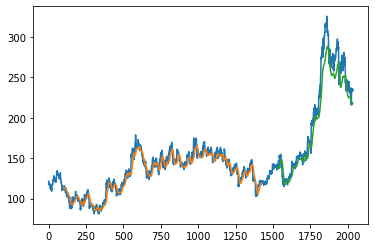

In [97]:
look_back = 100
train_num_pyredict_plot = np.empty_like(data_close)
train_num_pyredict_plot[:, :] = np.nan
train_num_pyredict_plot[look_back : len(train_predict) + look_back, :] = train_predict
test_predict_plot = np.empty_like(data_close)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (look_back * 2) + 1 : len(data_close) - 1, :] = test_predict
plt.plot(scaler.inverse_transform(data_close))
plt.plot(train_num_pyredict_plot)
plt.plot(test_predict_plot)
plt.show()

In [101]:
print(train_predict)
print(test_predict)

[[113.83637]
 [113.47221]
 [113.14769]
 ...
 [118.84924]
 [119.06075]
 [119.16143]]
[[137.9751  ]
 [138.16904 ]
 [138.34773 ]
 [138.43018 ]
 [138.41353 ]
 [138.29935 ]
 [138.13957 ]
 [137.96838 ]
 [137.78282 ]
 [137.58751 ]
 [137.39989 ]
 [137.27751 ]
 [137.22026 ]
 [137.27563 ]
 [137.48325 ]
 [137.71251 ]
 [137.92871 ]
 [138.14581 ]
 [138.35889 ]
 [138.71881 ]
 [139.24649 ]
 [139.93532 ]
 [140.75993 ]
 [141.6283  ]
 [142.54913 ]
 [143.4641  ]
 [144.35481 ]
 [145.23715 ]
 [146.07594 ]
 [146.84966 ]
 [147.56425 ]
 [148.16296 ]
 [148.56023 ]
 [148.62556 ]
 [148.36049 ]
 [147.7958  ]
 [146.9788  ]
 [145.92555 ]
 [144.6396  ]
 [143.10805 ]
 [141.39015 ]
 [139.5527  ]
 [137.59612 ]
 [135.61008 ]
 [133.58069 ]
 [131.51486 ]
 [129.50449 ]
 [127.581795]
 [125.801506]
 [124.142456]
 [122.62552 ]
 [121.26993 ]
 [120.05327 ]
 [119.00942 ]
 [118.18206 ]
 [117.59479 ]
 [117.26699 ]
 [117.15977 ]
 [117.22586 ]
 [117.4471  ]
 [117.7898  ]
 [118.20391 ]
 [118.66964 ]
 [119.164635]
 [119.66011 ]
 [120.

In [102]:
x_inum_pyut=test[307:].reshape(1, -1)
x_inum_pyut.shape
temp_inum_pyut = list(x_inum_pyut)
temp_inum_pyut = temp_inum_pyut[0].tolist()
temp_inum_pyut = list(x_inum_pyut)
temp_inum_pyut = temp_inum_pyut[0].tolist()
temp_inum_pyut

[0.3617238562091504,
 0.3790849673202614,
 0.3858251633986929,
 0.38092320261437906,
 0.39236111111111116,
 0.3790849673202614,
 0.3848039215686274,
 0.36907679738562094,
 0.3727532679738561,
 0.3637663398692811,
 0.3684640522875817,
 0.3727532679738561,
 0.3572303921568628,
 0.3602941176470589,
 0.36192810457516345,
 0.3535539215686274,
 0.34375,
 0.3500816993464052,
 0.3492647058823529,
 0.3656045751633986,
 0.3474264705882353,
 0.3314950980392156,
 0.30657679738562094,
 0.3400735294117646,
 0.39950980392156865,
 0.46119281045751637,
 0.44791666666666663,
 0.46343954248366015,
 0.47058823529411764,
 0.44485294117647056,
 0.4722222222222223,
 0.46282679738562094,
 0.4589460784313726,
 0.4468954248366013,
 0.47426470588235303,
 0.4781454248366013,
 0.4765114379084967,
 0.4589460784313726,
 0.4728349673202614,
 0.5106209150326797,
 0.5098039215686274,
 0.5145016339869282,
 0.5241013071895425,
 0.5355392156862746,
 0.5161356209150327,
 0.5355392156862746,
 0.5294117647058824,
 0.54064542

New [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
Predicted [101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130]


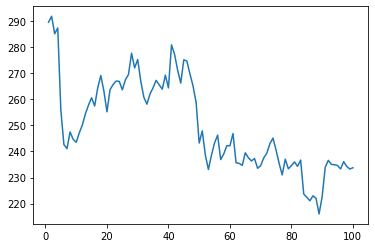

In [106]:
day_new = np.arange(1, 101)
print("New",day_new)
day_pred = np.arange(101, 131)
print("Predicted",day_pred)
plt.plot(day_new, scaler.inverse_transform(data_close[1935 : ]))